# Post-quantum Hash Based Cryptography

W tym laboratorium zajmiemy się kryptograrfią postkwantową bazującą na funkcjach skrótu. Wyjaśnijmy sobie więc raz a dobrze o czym dokładnie mowa. Post-quatum nie oznacza, że będziemy teraz pracować na kubitach. Chodzi o algorytmy, które są odporne na ataki z wykorzystaniem komputera kwantowego. Jak wiemy komputer kwantowy ma dużą moc obliczeniową. Chodzi więc o schematy, których złamanie z wykorzystaniem owego komputera jest efektywnie niemożliwe, tzn. czas poświęcony na przeporwadzenie udanego ataku jest bardzo duży. 

Algorytmy postkwantowe bazujące na funkcjach skrótu mają tę zaletę, że ich bezpieczeństwo bazuje wporst na bezpieczeństwie zastosowanej funkcji skrótu. Bezpieczeństwo funkcji skrótu zaś mierzymy z wykorzystaniem bitów bezpieczeństwa. Jeżeli chodzi o szczegółową analizę odsyłam do laboratoriów z SHA-2. Wadą (a może cechą?) tych algorytmów jest to, że umożliwiają one jedynie utworzenie podpisu cyfrowego, a nie wymianę klucza. Z drugiej jednak strony, są stosunkowo proste, co z kolei jest plusem. To im się dzisiaj przyjrzymy.

Główna idea idąca za algorytmami hash-based (HB) jest w większości przypadków taka sama. Podpisujący musi utworzyć pewne losowe wartości przypisane do obiektów, które chce podpisać. Te losowe wartości są haszowane i same skróty są publikowane jako klucze publiczne (znane wszystkim, każdy przypisany do swojego obiektu). W momencie, gdy podpisujący chce podpisać obiekt, musi ujawnić odpowiednią losową wartość, którą dla niego wygenerował i właśnie ta wartość stanowi podpis. Weryfikujący musi zahaszować otrzymany podpis i porównać w ten sposób uzyskany hasz z tym przypisanym do obiektu jako klucz publiczny. Weryfikacja przebiega prawidłowo, gdy obie wartości są takie same.

Algorytmy HB można podzielić na następujące typy:

  1. OTS - z ang. *One-Time Signatures*, czyli takie, gdzie podpis cyfrowy danego obiektu może być użyty tylko jeden raz. Utworzenie kolejnego podpisu wymaga przeprowadzenia ponownie wszystkich kroków algorytmu, włączając w to generowanie kluczy. Jest tak dlatego, iż każdorazowo podpisując obiekt ujawniamy część klucza tajnego. Przykładem algorytmów OTS są podpisy Lamporta czy podpisy Winternitza,

  1. MTS - z ang. *Multi-Time Signatures*, czyli takie, gdzie ten sam obiekt możemy podpisać na kilka sposobów i wysłać bezpieczne kryptograficznie podpisy w kilka miejsc. Sekretem stojącym za MTS jest to, że wykorzystują one wiele niezależnie utworzonych OTS. Kategoria MTS może jednak zostać podzielona na dwie podkategorie:

  stanowe - czyli takie, które muszą kontrolować, które z wygenerowanych OTS zostały już wykorzystane. Jest to starszy typ algorytmów, a jako przykład podać można podać drzewo Merkle (szczegółowo opisane w dalszej części). Ich głównym ograniczeniem jest to, że wszystkie OTS-y muszą być pregenerowane, mamy więc do czynienia z balansem pomiędzy efektywnością, a liczbą możliwych podpisów. Liczba pregenerowanych OTS-ów wprost wpływa na wysokość drzewa, a więc i na rozmiar danych w pamięci, i na ilość danych stanowiących pojedynczy podpis,

  bezstanowe - czyli takie, które nie muszą śledzić wykorzystanych OTS-ów. Ta kategoria tak naprawdę również ma skończoną liczbę OTS-ów do wykorzystania, tylko jest ona bardzo duża (np. rzędu $2^{256}$). Fakt ten pozwala na bezpieczne wybranie losowego z nich i przyzerowe prawdopodobieństwo wykorzystania go ponownie przez bardzo długi czas. W tej rodzinie algorytmów z oczywistych względów OTS-y nie są pregenerowane, tylko generowane na bieżąco. W bezstanowych podpisach MTS potrzebne jest tzw. drzewo certyfikacji. Drzewo certyfikacji pozwala dynamicznie generować niezbędne klucze publiczne, co -- przy założeniu, że klucze prywatne są tworzone w sposób deterministyczny z wykorzystaniem generatora liczb pseudolosowych (czyli znane jest ziarno tego generatora) - pozwala tworzyć ogromną liczbę podpisów bez nadmiernego przeciążania pamięci. 



## Podpis Lamporta (OTS)

Generowanie kluczy:

1. Dla $i = 1,...,n$ wygeneruj dwie losowe wartości: $\left\lbrace sk_{0, i}, sk_{1, i} \right\rbrace$, każda o długości $n$ bitów. W tym przypadku będzie to więc razem $n*2$ różnych wartości $sk$. Wartości $sk$ stanowią klucz prywatny.

2. Dla każdej wartości $sk_{j, i}$, gdzie $j =\left\lbrace 0, 1 \right\rbrace$, a $i = 1,...,n$ oblicz wartość $pk_{j, i} = H(sk_{j, i})$. Wartości $pk_{j, i}$ stanowią klucz publiczny.

Formalnie można napisać, że na końcu algorytmu generowania kluczy otrzymujemy dwa wektory par:
\begin{equation} 
\begin{split}
sk & = [\left\lbrace sk_{0, 1}, sk_{1, 1} \right\rbrace, \left\lbrace sk_{0, 2}, sk_{1, 2} \right\rbrace, ..., \left\lbrace sk_{0, n}, sk_{1, n} \right\rbrace] \\
pk & = [\left\lbrace pk_{0, 1}, sk_{1, 2} \right\rbrace, \left\lbrace pk_{0, 2}, pk_{1, 2} \right\rbrace, ..., \left\lbrace pk_{0, 2}, pk_{1, 2} \right\rbrace],
\end{split}
\end{equation}
gdzie $pk$ jest od początku publiczne dla wszystkich, a całość $sk$ do momentu tworzenia podpisu jest tajna.


Generowanie podpisu. Niech $M'$ oznacza wiadomość, którą należy podpisać:

1. Oblicz $M = H(M')$.
2. Niech $M = [b_{n}, b_{n-1}, ..., b_1]$, gdzie $b_i \in \left\lbrace 0, 1 \right\rbrace$. Zapis ten oznacza, że do utworzenia podpisu potrzebne będą bity ($b_i$) otrzymane ze skrótu z wiadomości $M'$.
3. Dla $i = 1,...,n$ podstawiaj $\sigma_{i} = sk_{b_i, i}$. Zapis ten oznacza, że każdy bit skrótu z wiadomości $b_i$ podpisywany jest oddzielnie wartościami losowymi $sk$ generowanymi wcześniej, przy czym jeżeli czytany bit ma wartość $1$, to podpisem tego bitu jest $sk_{1, i}$, a w przeciwnym razie $sk_{0, i}$.
4. Wyślij podpis $\sigma = [\sigma_1, \sigma_2, ..., \sigma_n]$ stronie weryfikującej wraz z wiadomością $M'$.

Weryfikacja podpisu:

1. Oblicz $M = H(M')$.
2. Niech $M = [b_{n}, b_{n-1}, ..., b_1]$, gdzie $b_i \in \left\lbrace 0, 1 \right\rbrace$.
3. Dla $i = 1,...,n$ sprawdzaj, czy $H(\sigma_{i}) = pk_{b_i, i}$. Jeżeli w którymkolwiek momemcie równość nie zachodzi, weryfikacja nie powiodła się. W przeciwnym razie, weryfikacja przebiegła pomyślnie.

Schemat ten oferuje $\frac{n}{2}$ bitów bezpieczeństwa, gdzie $n$ oznacza liczbę bitów skrótu zwracanego przez H.

## Podpis Winternitza (OTS)

Podpis Wintertza, czyli WOTS (z ang. *Winternitz One Time Signature*), posiada dodatkowy parametr $w$, który musi ustalić użytkownik. Wartość $w$ decyduje o liczbie bloków, na które będzie dzielony skrót $M$ z wiadomości $M'$ i powinna być ona potęgą czwórki (ze względów implementacyjnych). Większe wartości $w$ skutkują mniejszymi rozmiarami podpisu, ale i dłuższym czasem jego tworzenia.

Posiadając długość skrótu w bitach $n$ oraz wybraną wartość $w$ należy policzyć następujące wartości:

\begin{align}
    l_1 &= \left\lceil \frac{n}{log_2(w)} \right\rceil \\
    l_2 &= \left\lfloor \frac{log_2(l_1*(w - 1))}{log_2(w)} \right\rfloor + 1 \\
    L &= l_1 + l_2 
\end{align}

Wartość $l_1$ określa liczbę bloków utworzonych ze skrótu z wiadomości. Każdy taki blok składa się dokładnie z $log_2(w)$ bitów, które później są interpretowane jako liczby z zakresu $[0, w-1]$. Wartość $l_2$ określa minimalną liczbę bloków, na której można zapisać sumę kontrolną z tworzonej wiadomości. Są to również bloki $log_2(w)$ bitowe interpretowane jako liczby z przedziału $[0, w-1]$. Wartość $L$ określa długość całego podpisu.

Generowanie kluczy:

1. Dla $i = 1,...,L$ generuj losowe, $n$-bitowe wartości $sk_i$. Wynik tej operacji można zaprezentować w postaci wektora $sk = [sk_1, sk_2, ..., sk_L]$, który stanowi klucz prywatny.

2. Dla $i = 1,...,L$ obliczaj wartości $pk_i = H^{(w - 1)}(sk_i)$, gdzie $H^{(w - 1)}$ oznacza, że wykonujemy $w - 1$ haszowań, a wejściem każdego kolejnego jest wyjście poprzedniego. Przykładowo: $H^4(x) = H(H(H(H(x))))$. Obliczone wartości mogą zostać przedstawione w formie wektora $pk = [pk_1, pk_2, ..., pk_L]$, który stanowi klucz publiczny znany obu stronom komunikacji.

Tworzenie podpisu:

1. Oblicz skrót $M'' = H(M')$, gdzie $M'$ jest wiadomością podpisywaną.
2. Podziel skrót $M''$ na $l_1$ słów binarnych, każde o długości $log_2(w)$. Przekonwertuj każde z otrzymanych słów binarnych na liczby. Wynikiem operacji powinien być wektor $M = [M_1, M_2, ..., M_{l_1}]$, gdzie $M_i$ jest liczbą z przedziału $[0, w - 1]$.
3. Oblicz sumę kontrolną jako $CS' = \sum_{i=1}^{l_1} w - 1 - M_i$. Następnie podziel sumę kontrolną na $l_2$ słów binarnych (każde o długości $log_2(w)$) i przekonwertuj te słowa na liczby. Wynikiem operacji powinien być wektor $CS = [cs_1, cs_2, ..., cs_{l_2}]$, gdzie $cs_i$ jest liczbą z przedziału $[0, w - 1]$.
4. Dołącz bloki sumy kontrolnej do bloków wiadomości $M$. Wynikiem działania powinien być wektor: $M = [M_1, M_2, ..., M_{l_1}, CS_1, CS_2, ..., CS_{l_2}]$. Ponieważ suma kontrolna musi być podpisana razem z wiadomością, a $l_1 + l_2 = L$, dla uproszczenia nowy wektor wiadomości zostanie oznaczony jako $M = [M_1, M_2, ..., M_L]$.
5. Sygnaturę wiadomości stanowi wektor $\sigma = [\sigma_1, \sigma_2, ..., \sigma_L]$, gdzie $\sigma_i = H^{M_i}(sk_i)$. Wyślij sygnaturę wraz z wiadomością $M'$ stronie weryfikującej.

Weryfikacja podpisu:

1. Wykonaj kroki 1 - 4 z algorytmu tworzenia podpisu opisanego powyżej.
2. Oblicz elementy wektora $p = [p_1, p_2, ..., p_L]$, gdzie $p_i = H^{w - 1 - M_i}(\sigma_i)$.
3. Dla $i = 1, ..., L$ wykonaj porównania $p_i = pk_i$. Jeżeli w którymkolwiek momencie równość nie zachodzi, weryfikacja nie powiodła się. W przeciwnym przypadku weryfikacja powiodła się.

Schemat ten oferuje $\frac{n}{2}$ bitów bezpieczeństwa, gdzie $n$ oznacza liczbę bitów skrótu zwracanego przez H.

## Drzewo Merkle (MTS)

Drzewo Merkle jest idealnym drzewem binarnym, którego liście stanowią podpisy WOTS, węzły mają wartość skrótu obliczonego ze swoich dzieci ($||$ oznacza konkatenację), a węzeł główny (z ang. *root noode*) stanowi klucz publiczny. Drzewo o wysokości $h$ zawiera $2^h$ węzłów będących liśćmi (podpisy WOTS).

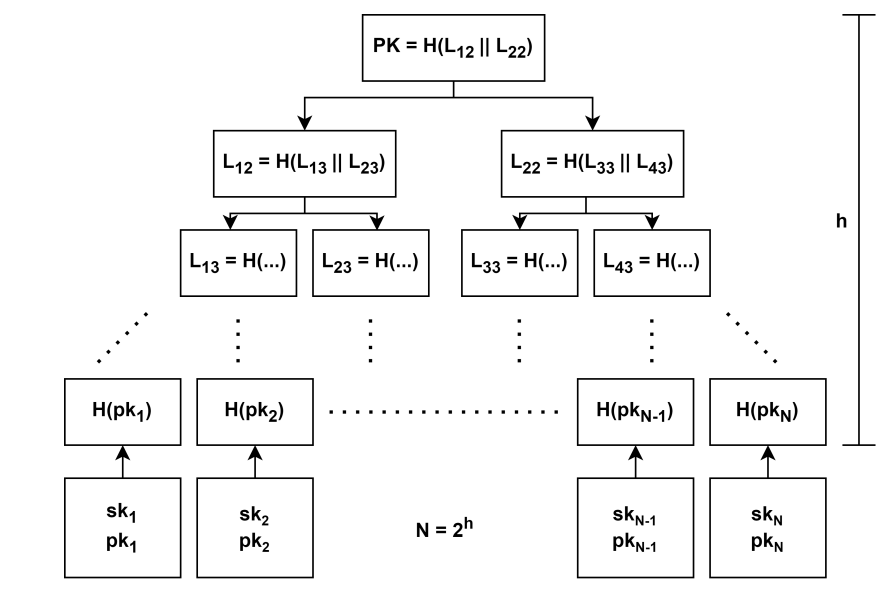

Główną zaletą tego schematu jest to, że jest jeden klucz publiczny, który może być użyty wielokrotnie i jest rozmiaru $n$, gdzie $n$ to długość skrótu zwracana przez funkcję skrótu $H$. Podpisujący wykorzystuje standardowo schemat WOTS do utworzenia podpisu z wiadomości $M'$, ale upublicznia weryfikującemu sam podpis $\sigma$, klucz publiczny $PK$ oraz tzw. ścieżkę autentykacji. Nie upublicznia natomiast klucza publicznego WOTS $pk$, którego rozmiary są znacznie większe niż $PK$. Ścieżka autentykacji to skróty z węzłów pośrednich, które mają umożliwić weryfikującemu odtworzenie klucza głównego $PK$. Przykładowa ścieżka autentykacji została zaprezentowana na rysunku poniżej, gdzie dla niewielkiego drzewa podpisujący wybrał pierwszą parę kluczy WOTS (wierzchołek oznaczony na zielono), a do utworzonego podpisu musi dołączyć wszystkie skróty oznaczone na pomarańczowo. Warto dodać, że udostępnianie weryfikującemu liścia oznaczonego na zielono jest niepotrzebne, gdyż wartość $pk_1$ weryfikujący obliczy sam z otrzymanego podpisu $\sigma_1$ (zgodnie z algorytmem WOTS). 

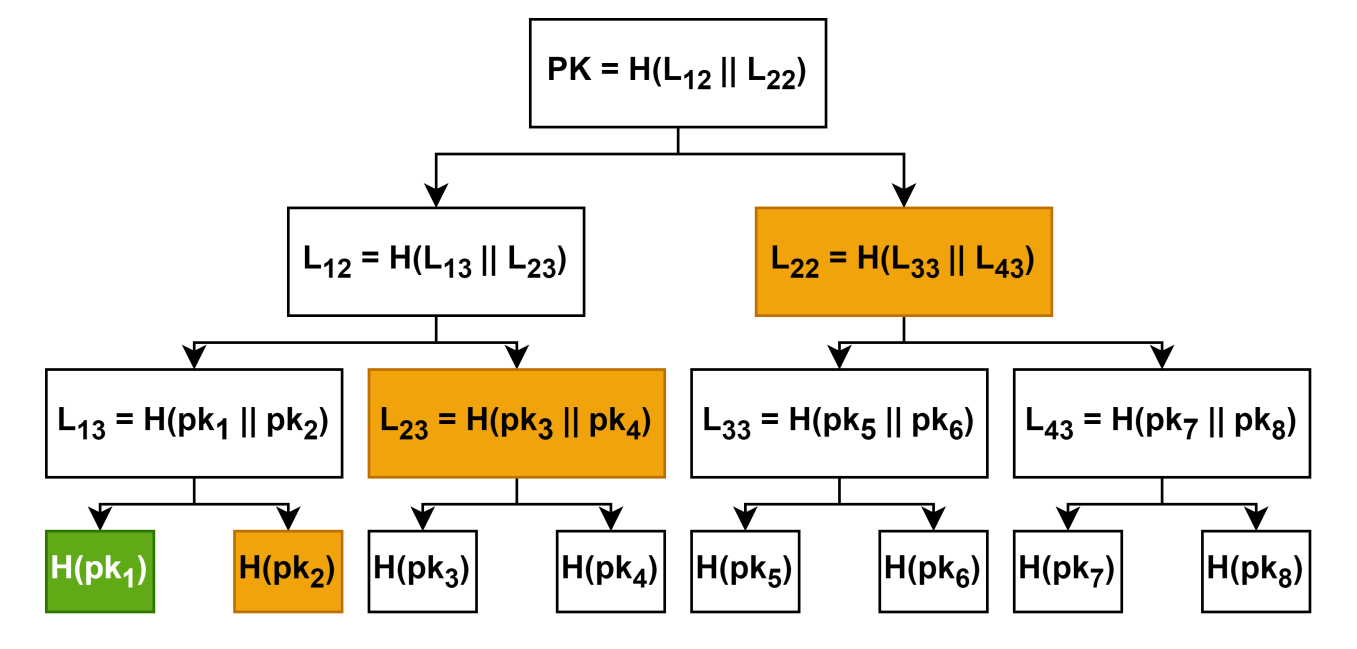

Generowanie kluczy:

1. Wygeneruj klucze dla schematów WOTS $(sk_i, pk_i)$ dla $i = 0,..., 2^h - 1$.
2. Oblicz liście Drzewa Merkle: $node_{(2^h + i)} = H(pk_i)$, dla $i = 0,..., 2^h - 1$.
3. Oblicz pozostałe węzły Drzewa Merkle (te niebędące liśćmi): $node_i = H(node_{2i} || node_{2i + 1})$. Kluczem głównym $PK$ jest węzeł o indeksie 0, czyli $node_0$.

Generowanie podpisu:

1. Oblicz skrót $M'$ z wiadomości $M$: $M' = H(M)$.
2. Wybierz parę kluczy WOTS $(sk_i, pk_i)$, które zostaną użyte do stworzenia podpisu wiadomości. Podpisujący musi wiedzieć, które pary już wykorzystał i wziąć kolejną, która nie była jeszcze użyta. Wartość $i$ jest określana mianem ,,stanu''.
3. Utwórz podpis WOTS: $\sigma$ i dostarcz podpis wraz ze ścieżką autentykacji do strony weryfikującej. Ścieżkę autentykacji stanowią odpowiednie węzły drzewa Merkle.

Weryfikacja podpisu:

1. Oblicz skrót $M'$ z wiadomości $M$: $M' = H(M)$.
2. Wykorzystując algorytm WOTS przywróć wartość $pk_i$ z otrzymanego podpisu $\sigma_i$.
3. Oblicz skrót z $pk_i$ i wykorzystując ścieżkę autentykacji odtwórz wartość $PK$ (czyli węzła $node_0$).
4. Jeżeli odtworzona wartość $PK$ jest taka sama co udostępniona przez stronę tworzącą podpis -- weryfikacja powiodła się. W przeciwnym razie została zakończona niepowodzeniem.

## HORS (FTS)

Algorytm HORS (*Hash to Obtain Random Subset*) należy do kategorii tzw. algorytmów FTS, czyli *Few Times Signatures*. Tak naprawdę FTS-y nie są do końca ani OTS-ami, an[tekst linku](https://)i MTS-ami, ciężko je więc zaklasyfikować. Teoretycznie wygenerowanego zestawu danych można użyć więcej niż raz. W praktyce jednak, każde kolejne użycie tego samego zestawu zmniejsza sukcesywnie jego bezpieczeństwo. 

Algorytm HORS nie jest uznawany za bezpieczny. W szczególności jest podatny na tzw. *subset-resilent problem* lub inaczej mówiąc *Weak Messages Attack*. Niemniej jest to algorytm istotny, gdyż stanowi on swoistą bazę dla algorytmu FORS, który jest wykorzystywany w SPHINCS+.
Niech $k\tau$ oznacza długość skrótu zwracaną przez funkcję skrótu $H$. Parametry $k\tau$ dobierane są tak, że skrót z wiadomości $m$ równy $H(m)$ można podzielić na $k$ równych bloków bitów, każdy w reprezentacji liczbowej z przedziału $t = 0,...,t-1$, gdzie $t = 2^{\tau}$. Wartość $t$ zawsze musi być potęgą dwójki.

Generowanie kluczy:

1. Wygeneruj $t$ losowych wartości stanowiących klucz prywatny: 

\begin{equation}
    sk = [sk_1, sk_2, ..., sk_t],
\end{equation}

2. Oblicz klucz publiczny PK:

 \begin{equation}
     PK = [pk_1, pk_2, pk_t] = [H(sk_1), H(sk_2),..., H(sk_t)].
 \end{equation}


Tworzenie podpisu:

1. Oblicz skrót z wiadomości $m$ i podziel go na $k$ bloków każdy o długości bitowej $\tau$:

\begin{equation}
    H(m) = [M_1, M_2, ..., M_k],
\end{equation}

2. Podpisem wiadomości są elementy klucza prywatnego, których indeksy odpowiadają wartościom liczbowym bloków skrótu: 

 \begin{equation}
     \sigma = [\sigma_1, \sigma_2, ..., \sigma_k] = [sk_{M_{1}}, sk_{M_{2}}, ..., sk_{M_{k}}].
 \end{equation}

Weryfikacja podpisu:

1. Weryfikacja podpisu polega na ponownym obliczeniu bloków skrótu z wykorzystaniem $H_K$ i sprawdzeniu, czy zachodzi równość:

\begin{equation}
H(sk_{M_i}) = pk_{M_{i}} \text{ dla }  = 1, ..., k
\end{equation}

## Zadanie

1. Zaprogramuj tworzenie i weryfikowanie podpisu Lamporta.
2. Zaprogramuj tworzenie i weryfikowanie podpisu Winternitza. Niech $w = 16$.
3. Zaprogramuj tworzenie i weryfikowanie podpisów z wykorzystaniem Drzewa Merkle w oparciu o podpis Winternizta z punktu 2. Niech liczba liści będzie równa przynajmniej 16. Zaprezentuj wykorzystanie wszysytkich podpisów WOTS. Zastanów się jak obliczać ścieżkę autentykacji.
4. Zaprogramuj tworzenie i weryfikowanie podpisu HORS. Zastanów się nad wyborem $k$ oraz $\tau$. Klucz może być dowolny.

In [1]:
# Utils imports
!pip install pycryptodome
import Crypto.Util.number as cu
import hashlib as hl
import math

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.2 MB/s eta 0:00:00


In [2]:
# Utils

def random_number(bits):
    return cu.getRandomInteger(bits)

def hash_to_object(input, H):
    if isinstance(input, int):
        input = cu.long_to_bytes(input)
    elif isinstance(input, str):
        input = bytes(input, 'utf-8')
    return H(input)

def hash_to_int(input, H):
    return int(hash_to_object(input, H).hexdigest(), 16)

def hash_to_int_multiple(input, exponent, H):
    result = input
    for i in range(exponent):
        result = hash_to_int(result, H)
    return result

def bits_iterator(input, step=1):
    if input == 0:
        yield 0
        return
    else:
        while input > 0:
            yield input % pow(2, step)
            input >>= step
        return

def list2d_to_str(l):
    return f'(list of size {len(l)} x {len(l[0])}) {l}'

def list1d_to_str(l):
    return f'(list of size {len(l)}) {l}'

def concat_ints(n, *ints):
    result = 0
    for i in ints:
        result <<= n
        result |= i
    return result


# Rozwiązanie: Podpis Lamporta

In [3]:
def lamport_keygen(n, H=hl.sha256):
    sk = [ [ random_number(n) for i in range(n) ], [ random_number(n) for i in range(n) ] ]
    pk = [ [ hash_to_int(sk[i][j], H) for j in range(n) ] for i in range(2) ]
    return sk, pk

def lamport_sign(message, sk, H=hl.sha256):
    M = hash_to_int(message, H)
    sig = [ sk[b][i] for i, b in enumerate(bits_iterator(M)) ]
    return sig

def lamport_verify(message, signature, pk, H=hl.sha256):
    M = hash_to_int(message, H)
    verification = [ hash_to_int(signature[i], H) == pk[b][i] for i, b in enumerate(bits_iterator(M)) ]
    return not (False in verification)


In [1]:
message = 0x123abc
n = 256
print(f'Message:    {hex(message)}')
sk, pk = lamport_keygen(n)
print(f'Secret key: {list2d_to_str(sk)}')
print(f'Public key: {list2d_to_str(pk)}')
sig = lamport_sign(message, sk)
print(f'Signature:  {list1d_to_str(sig)}')
is_valid = lamport_verify(message, sig, pk)
print(f'Is valid?   {is_valid}')

Message:    0x123abc


NameError: ignored

# Rozwiązanie Podpis Winternitza

In [5]:
def winternitz_length(n, w):
    l1 = math.ceil(n / math.log2(w))
    l2 = math.floor((math.log2(l1 * (w - 1))) / math.log2(w)) + 1
    L = l1 + l2
    return l1, l2, L

def winternitz_keygen(n, w, H=hl.sha256):
    l1, l2, L = winternitz_length(n, w)
    sk = [ random_number(n) for i in range(L) ]
    pk = [ hash_to_int_multiple(sk[i], w-1, H) for i in range(L) ]
    return sk, pk

def winternitz_create_blocks(message, n, w, l1, H):
    word_length = int(math.log2(w))
    M = [ i for i in bits_iterator(hash_to_int(message, H), word_length) ]
    CS_1 = sum([ w - 1 - M[i] for i in range(l1) ])
    CS = [ i for i in bits_iterator(CS_1, word_length) ]
    M.extend(CS)
    return M

def winternitz_sign(message, sk, n, w, H=hl.sha256):
    l1, l2, L = winternitz_length(n, w)
    M = winternitz_create_blocks(message, n, w, l1, H)
    sig = [ hash_to_int_multiple(sk[i], M[i], H) for i in range(L) ]
    return sig

def winternitz_retrieve_pk(message, signature, pk, n, w, H=hl.sha256): # intermediate step used by emrkle trees
    l1, l2, L = winternitz_length(n, w)
    M = winternitz_create_blocks(message, n, w, l1, H)
    return [ hash_to_int_multiple(signature[i], w - 1 - M[i], H) for i in range(L) ]

def winternitz_verify(message, signature, pk, n, w, H=hl.sha256):
    l1, l2, L = winternitz_length(n, w)
    p = winternitz_retrieve_pk(message, signature, pk, n, w, H)
    verification = [ p[i] == pk[i] for i in range(L) ]
    return not (False in verification)
     

In [6]:
message = 0x123abc
n, w = 256, 16
print(f'Message:    {hex(message)}')
sk, pk = winternitz_keygen(n, w)
print(f'Secret key: {list1d_to_str(sk)}')
print(f'Public key: {list1d_to_str(pk)}')
sig = winternitz_sign(message, sk, n, w)
print(f'Signature:  {list1d_to_str(sig)}')
is_valid = winternitz_verify(message, sig, pk, n, w)
print(f'Is valid?   {is_valid}')

Message:    0x123abc
Secret key: (list of size 67) [38099538114510372964308685061605362076025029829401392032554695076051656255071, 59091274834887133450555085228414523549215663017550192956471330811457691851393, 83970790309999336876765079631092954863440493845289074473107027397741887771164, 92449632993356758184831660575672058630836005728489389251437839861184082052845, 53005731189266006586006632742992779393031415298609714910463893858513541506469, 43994827517932247488497889032498949200563775833744281008760365684256797382762, 37374257867611698065644929203530452372171143811659722886812074867415339609820, 106533033017772915086990887271680217734345414055928691471573496434035211698380, 49393321805092413494646092853212641650408955458943039168504021484107855853611, 89912713322774151627286962802192009151186043457494059323835105996554065164496, 90608371631292732257675159960440814731409766104520979978131168456702651704413, 61792876208334114120266152032771385177392431877071351936360085487614023304334,

# Rozwiązanie Drzewo Merkle

In [7]:
# Tree utils
def recursive_merkle_keygen(tree, i, n, pk, h, H):
    # tree is a list with first node at index 1
    # returns the element, calculates it if doesn't exist (changes state of the tree)
    if i == 0:
        return None # elem. 0 is always None
    elif tree[i] is None:
        if i >= pow(2, h - 1):
            # caclulate leaf
            concat_pk = concat_ints(n, *pk[i - pow(2, h)]) # my modification, pk is a list, H(pk) is nonsense
            tree[i] = hash_to_int(concat_pk, H)
        else:
            # calculate branch
            child1 = recursive_merkle_keygen(tree, 2*i, n, pk, h, H)
            child2 = recursive_merkle_keygen(tree, 2*i+1, n, pk, h, H)
            tree[i] = hash_to_int(concat_ints(n, child1, child2), H)
    return tree[i] # already calculated, return result

def calc_auth_path(tree, i):
    path = []
    while i > 1: # while we have not reached the top of the tree yet
        sibling = i + 1 if i % 2 == 0 else i - 1
        parent = i // 2
        i = parent
        path.append(sibling)
    return path



# Merkle
def merkle_keygen(n, w, h, H=hl.sha256):
    leaf_count = int(pow(2, h - 1)) # my modification
    node_count = int(pow(2, h)) - 1 # my modification
    keys = [ winternitz_keygen(n, w, H) for i in range(leaf_count) ]
    sk = [ sk for sk, _ in keys ]
    pk = [ pk for _, pk in keys ]

    tree = [ None for i in range(node_count + 1) ]
    main_pk = recursive_merkle_keygen(tree, 1, n, pk, h, H)

    used_pairs = [ False for _ in range(leaf_count) ]
    return sk, used_pairs, pk, tree

def merkle_sign(message, sk, used_pairs, tree, n, w, h, H=hl.sha256):
    # find an unused (sk, pk) pair
    ski = None
    pk_index = None
    for i, used in enumerate(used_pairs):
        if not used:
            ski = sk[i]
            pk_index = i
            used_pairs[i] = True
            break
    if ski is None:
        raise RuntimeError('All keys have already been used!')

    # find authentication path
    path = calc_auth_path(tree, pow(2, h-1) + pk_index)

    # sign
    sig = winternitz_sign(message, ski, n, w, H)

    return sig, pk_index, path

def merkle_verify(message, sig, pk, pk_index, tree, auth_path, n, w, H=hl.sha256):
    pki = winternitz_retrieve_pk(message, sig, pk[pk_index], n, w, H)
    PK = tree[1]

    concat_pk = concat_ints(n, *pki) # my modification, pki is a list, H(pki) is nonsense
    hash = hash_to_int(concat_pk, H)
    current_hashed_index = pow(2, h-1) + pk_index
    for i in auth_path:
        if i > current_hashed_index: # makes sure the order of hashing is right
            hash = hash_to_int(concat_ints(n, hash, tree[i]), H)
        else:
            hash = hash_to_int(concat_ints(n, tree[i], hash), H)
        current_hashed_index = i // 2
    
    return hash == PK



In [8]:
message = 0x123abc
n, w, h = 256, 16, 5
print(f'Message:    {hex(message)}')
sk, used_pairs, pk, tree = merkle_keygen(n, w, h)
print(f'Secret key: {list2d_to_str(sk)}')
print(f'Public key: {list2d_to_str(pk)}')
sig, pk_index, auth_path = merkle_sign(message, sk, used_pairs, tree, n, w, h)
print(f'Signature:  {list1d_to_str(sig)}')
print(f'PK index :  {pk_index}')
print(f'Auth path:  {list1d_to_str(auth_path)}')
is_valid = merkle_verify(message, sig, pk, pk_index, tree, auth_path, n, w)
print(f'Is valid?   {is_valid}')

print('--------------------')

message = 0x123abc
print(f'Message:    {hex(message)}')
sig, pk_index, auth_path = merkle_sign(message, sk, used_pairs, tree, n, w, h)
print(f'Signature:  {list1d_to_str(sig)}')
print(f'PK index :  {pk_index}')
print(f'Auth path:  {list1d_to_str(auth_path)}')
is_valid = merkle_verify(message, sig, pk, pk_index, tree, auth_path, n, w)
print(f'Is valid?   {is_valid}')

print('--------------------')

message = 0x123abc
print(f'Message:    {hex(message)}')
sig, pk_index, auth_path = merkle_sign(message, sk, used_pairs, tree, n, w, h)
print(f'Signature:  {list1d_to_str(sig)}')
print(f'PK index :  {pk_index}')
print(f'Auth path:  {list1d_to_str(auth_path)}')
is_valid = merkle_verify(message, sig, pk, pk_index, tree, auth_path, n, w)
print(f'Is valid?   {is_valid}')

Message:    0x123abc
Secret key: (list of size 16 x 67) [[31777772799678560274046242610160176542335053954765442087518899289742770232737, 69078311620389611367114989268957201145017147256406955305628528839169193425801, 60307467550434012696623649000111365503310678154363645995141205755054266005476, 57289924785842250949835546911025489071832443766027440887378606589239848348187, 11480948012034202461106514519089026440578181328335978752640694278371822097684, 49426348853929306433290159730527372253672286435044405178123021679243243348092, 98339295438431623014001911315736954718004691353136109912365760603304490698405, 105813616471124987570919430724198116849632142410504843296393977050426249193810, 33905962284164208825404998083130657001285520139403793392921255427611128657502, 73073386665270853972074410853085435257573377653579891409510031692470811035, 52010606010962073853534896978759439563623649499990806877637453303569384020120, 965669328112999255613589952617808784352616155960619219587581871941423765319

# Rozwiązanie HORS

In [9]:
def hors_keygen(tau, H=hl.sha256):
    sk = [ random_number(tau) for i in range(pow(2, tau)) ]
    pk = [ hash_to_int(ski, H) for ski in sk ]
    return sk, pk

def hors_sign(message, sk, tau, H=hl.sha256):
    M = hash_to_int(message, H)
    
    sig = [ sk[chunk] for chunk in bits_iterator(M, step=tau) ]
    return sig

def hors_verify(message, sig, pk, tau, H=hl.sha256):
    M = hash_to_int(message, H)

    verification = [ hash_to_int(sig[i], H) == pk[chunk] for i, chunk in enumerate(bits_iterator(M, step=tau)) ]
    return not (False in verification)

In [10]:
message = 0x123abc
n = 256
tau = 8
print(f'Message:    {hex(message)}')
sk, pk = hors_keygen(tau)
print(f'Secret key: {list1d_to_str(sk)}')
print(f'Public key: {list1d_to_str(pk)}')
sig = hors_sign(message, sk, tau)
print(f'Signature:  {list1d_to_str(sig)}')
is_valid = hors_verify(message, sig, pk, tau)
print(f'Is valid?   {is_valid}')

Message:    0x123abc
Secret key: (list of size 256) [184, 220, 238, 112, 198, 80, 87, 139, 178, 209, 251, 87, 23, 108, 59, 119, 207, 158, 180, 118, 144, 149, 42, 61, 59, 22, 68, 149, 213, 114, 63, 33, 175, 152, 135, 40, 127, 216, 26, 6, 185, 143, 160, 9, 106, 114, 43, 125, 206, 231, 242, 153, 221, 196, 15, 139, 240, 129, 186, 209, 103, 1, 12, 11, 114, 5, 140, 253, 40, 75, 27, 97, 124, 79, 240, 254, 249, 224, 202, 92, 78, 105, 180, 134, 197, 2, 199, 58, 133, 45, 227, 4, 88, 229, 158, 231, 240, 2, 220, 49, 151, 197, 86, 236, 209, 118, 192, 146, 15, 47, 199, 61, 51, 3, 177, 248, 123, 24, 1, 234, 75, 23, 125, 152, 208, 113, 169, 216, 56, 232, 38, 165, 34, 60, 22, 183, 163, 203, 134, 205, 74, 255, 176, 176, 40, 32, 189, 70, 253, 185, 71, 216, 7, 183, 55, 70, 25, 222, 85, 122, 216, 65, 227, 24, 197, 54, 115, 123, 154, 10, 16, 108, 70, 119, 6, 255, 68, 161, 194, 45, 64, 103, 156, 201, 204, 55, 69, 80, 13, 165, 178, 34, 141, 103, 69, 199, 204, 29, 222, 169, 144, 135, 74, 158, 187, 99, 73, 17, 